In [1]:
from eda import *

In [2]:
train = eda('../0-Data/org/train.csv')

In [3]:
train.features

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

## 1. Rated values (int)
[50~59]
* tp01 : Extraverted, enthusiastic. (외향적)
* tp02 : Critical, quarrelsome. (비판적)
* tp03 : Dependable, self-disciplined. (신뢰할수있는)
* tp04 : Anxious, easily upset.(불안)
* tp05 : Open to new experiences, complex.(개방, 유연)
* tp06 : Reserved, quiet.(수동적)
* tp07 : Sympathetic, warm. (공감적)
* tp08 : Disorganized, careless.(무질서한, 무신경한)
* tp09 : Calm, emotionally stable.(정적인)
* tp10 : Conventional, uncreative.(보수적)

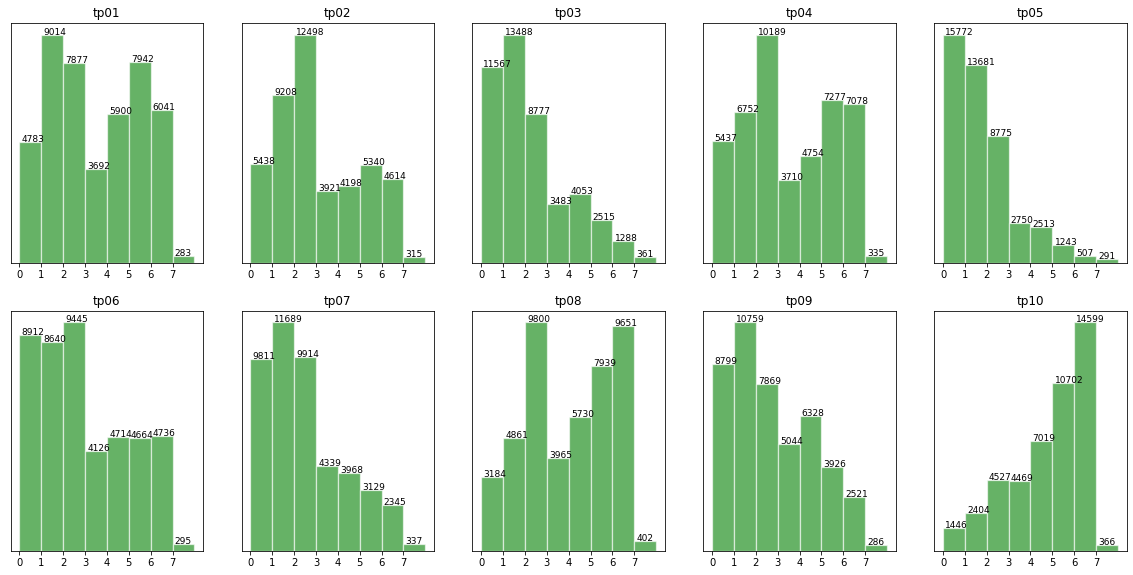

In [4]:
train.plot_multi_hist([i for i in range(50,60)])

## 2. Personal info ( int )
* [42] education : 교육 수준
1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답
* [43] engnat : 모국어가 영어
1=Yes, 2=No, 0=무응답
* [46] hand : 필기하는 손
1=Right, 2=Left, 3=Both, 0=무응답
* [47] married : 혼인 상태
1=Never married, 2=Currently married, 3=Previously married, 0=Other
* [60] urban : 유년기의 거주 구역
1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

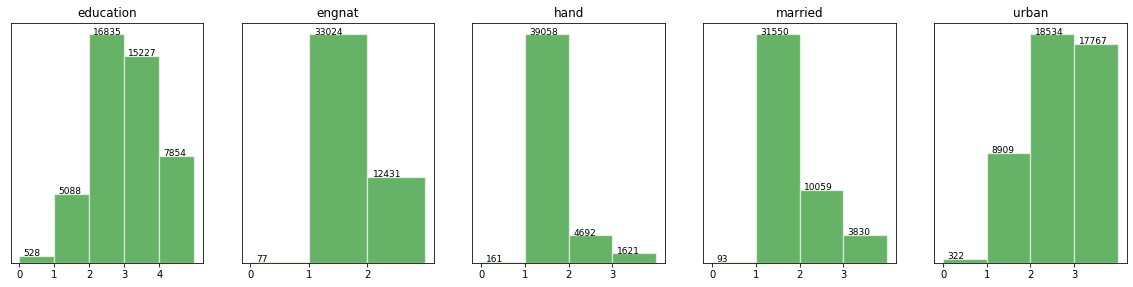

In [5]:
train.plot_multi_hist([42,43,46,47,60])

## 3. Personal info ( object )
* [41] age_group : 연령
* [45] gender : 성별
Male, Female
* [48] race : 인종
Asian, Arab, Black, Indigenous Australian, Native American, White, Other
* [49] religion : 종교
Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


test


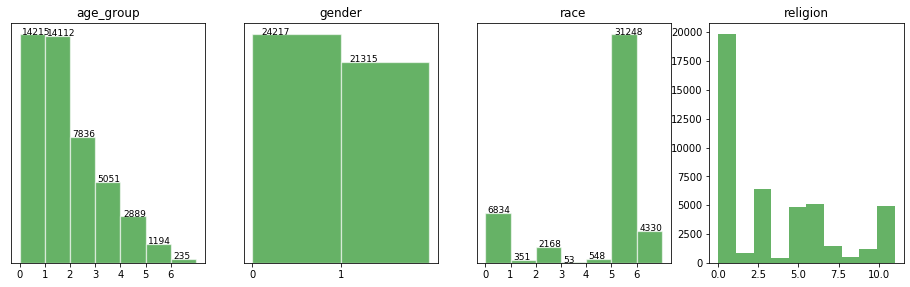

In [6]:
train.plot_multi_hist([41,45,48,49],r=4)

## 4. Word info  ( int )
* wr_(01~13) : 실존하는 해당 단어의 정의을 앎
1=Yes, 0=No
* wf_(01~03) : 허구인 단어의 정의를 앎
1=Yes, 0=No

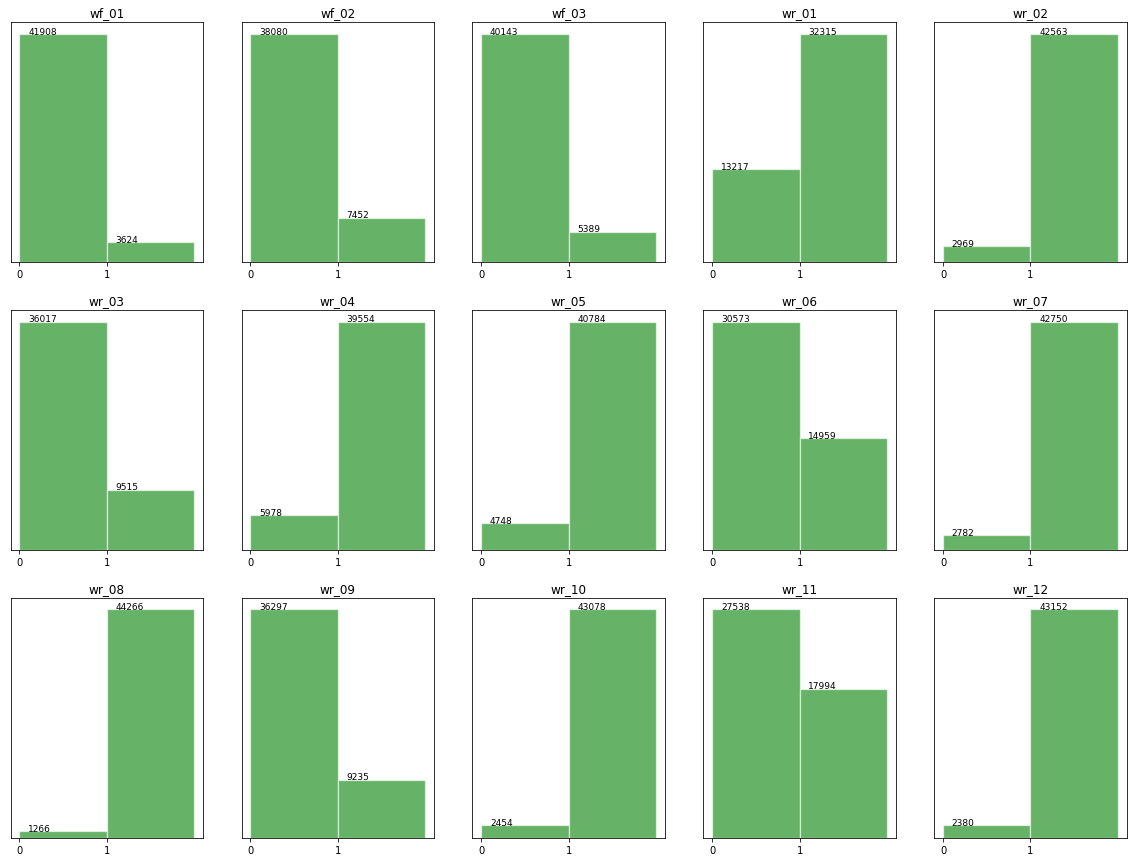

In [7]:
train.plot_multi_hist([i for i in range(62,77)])

## 4. Vote info  ( int ) -> y

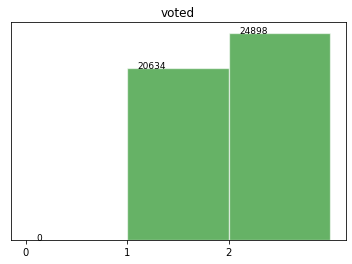

In [8]:
train.plot_hist(61)

In [6]:
import copy
_,y=train.get_info(61)
y=np.array(y)
y_train = copy.deepcopy(y)
for idx in range(len(y_train)):
    if y_train[idx]==2:
        y_train[idx]=0

In [9]:
x_train=[]
for idx in range(50,60):
    _,x=train.get_info(idx)
    x_train.append(x)
x_train = np.array(x_train)

0    2
1    1
Name: tp01, dtype: int64
0    2
1    1
Name: tp02, dtype: int64
0    2
1    0
Name: tp03, dtype: int64
0    1
1    0
Name: tp04, dtype: int64
0    2
1    1
Name: tp05, dtype: int64
0    1
1    2
Name: tp06, dtype: int64
0    7
1    3
Name: tp07, dtype: int64
0    4
1    4
Name: tp08, dtype: int64
0    4
1    0
Name: tp09, dtype: int64
0    3
1    4
Name: tp10, dtype: int64


In [11]:
x_train=x_train.T
x_train.shape, y_train.shape

((45532, 10), (45532,))

In [12]:
x_train=x_train/7

In [39]:
model=make_model(10)

In [43]:
import lightgbm as lgbm

In [59]:
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(x_train[:40000], y_train[:40000])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [64]:
y_pred = model.predict(x_train[40000:])
y_pred.shape

(5532,)

In [65]:
acc, n = 0, 0
for y, y_h in zip(y_train[40000:], y_pred):
    if y==y_h:
        acc+=1
    n+=1
acc, n

(3186, 5532)

In [66]:
acc/n

0.5759219088937093